# Neural Networks for Fashion Image Classification and Visual Search

## BT5153 Applied Machine Learning Group Project
#### Authors: Fengzi Li (A0206468Y) | Shashi Kant (A0206456E) | Shunichi Araki (A0206507L) | Sumer Bangera (A0206510X) | Swapna Samir Shukla (A0206512U)*

*All authors are graduate students of MSBA program Class of 2020 at NUS Business School.

### This Notebook searving for: Visual Search

## 1. Loading Kaggle dataset

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "escapingzizi" # username from the json file
os.environ['KAGGLE_KEY'] = "29c04197427ca3bff3b6d0fd8fc243b8" # key from the json file

In [0]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-small

 97% 551M/565M [00:08<00:00, 38.3MB/s]
100% 565M/565M [00:08<00:00, 69.3MB/s]


In [0]:
! unzip 'fashion-product-images-small.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [0]:
DATASET_PATH = "/content/myntradataset/"
print(os.listdir(DATASET_PATH))

['styles.csv', 'images']


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 2. Data Preparation before AutoEncodering

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
from multiprocessing import Pool
from keras_preprocessing.image import ImageDataGenerator

In [0]:
styles = pd.read_csv('styles.csv',error_bad_lines=False)
styles.head()

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


image name = 19586.jpg, image size = (80, 60, 3), image data type = uint8


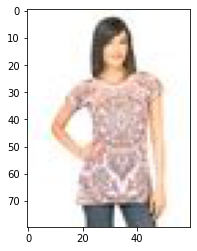

In [0]:
# get basic information of image
fname = random.choice([x for x in os.listdir('images')
               if os.path.isfile(os.path.join('images', x))])
image = mping.imread('images/' + fname)
plt.imshow(image)
print('image name = {}, image size = {}, image data type = {}'.format(fname, image.shape, image.dtype))

In [0]:
# mapping between images and styles.csv
from multiprocessing import Pool
   
p = Pool(5) # process 5 images simultaneously

image_name = []
for x in os.listdir('images'):
  if os.path.isfile:
    image_path = os.path.join('images', x)
    image_name.append(os.path.basename(image_path))

In [0]:
# convert list to integer
image_number = [i.split('.')[0] for i in image_name]
image_number = [int(i) for i in image_number]
image_number = pd.DataFrame(image_number, columns = ['id'])
# image_number.head(3)

In [0]:
# inner join styles dataframe and image_number in images folder
styles_image = pd.merge(styles, image_number, how='inner', on = 'id')
print('Inner joint styles and images dataframe size = {}'.format(styles_image.shape))

Inner joint styles and images dataframe size = (44419, 10)


In [0]:
# add in image name column for ImageDataGenerator
styles_image['image_name'] = styles_image.apply(lambda row: str(row['id']) + '.jpg', axis = 1)
styles_image.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,articleType_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,3215
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,608
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,2542
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,304
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,7065


### 2.1 Build DataGenerator

In [0]:
# defind image generator for batch imgae loading and labelling
# flow_from function parameters explanation can refer to: https://keras.io/preprocessing/image/

def data_generator(train_dataframe, sel_y_col, num_samples):
    '''
    this function is used to load image data,label is actually not used in model training
    '''

    batch_size = 64
    image_width = image.shape[0]
    image_height = image.shape[1]

    image_generator = ImageDataGenerator(rescale=1./255)
                                        #  validation_split = 0.1) we can't get the original image_name in original sequence

    training_generator = image_generator.flow_from_dataframe(
        dataframe = train_dataframe,
        directory = 'images',
        x_col = 'image_name', # image .jpg name
        y_col = sel_y_col, 
        target_size = (image_height,image_height), # original image size =(80,60,3) now make image_width and image_height the same!
        batch_size = batch_size, # default value
        shuffle = False,
        class_mode = 'categorical'
    )

    n_classes = len(training_generator.class_indices)
    print('total number of subset samples', num_samples)
    print('total number of class', n_classes)

    return training_generator, n_classes

In [0]:
# articleType data generators
training_generator, n_classes = data_generator(styles_image, 'articleType', articleType_samples)

Found 44419 validated image filenames belonging to 142 classes.
total number of subset samples 23066
total number of class 142


In [0]:
training_generator.filenames[:10]

['15970.jpg',
 '39386.jpg',
 '59263.jpg',
 '21379.jpg',
 '53759.jpg',
 '1855.jpg',
 '30805.jpg',
 '26960.jpg',
 '29114.jpg',
 '30039.jpg']

In [0]:
styles_image.iloc[:10,10]

0    15970.jpg
1    39386.jpg
2    59263.jpg
3    21379.jpg
4    53759.jpg
5     1855.jpg
6    30805.jpg
7    26960.jpg
8    29114.jpg
9    30039.jpg
Name: image_name, dtype: object

In [0]:
batch_size = 64
training_samples = len(training_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, total_steps)

44419 694


AutoEncoder model is self-supervisored learnning. Input is image features Output is itself. Input and Output are the same.

In [0]:
import math
# getting the X features from generator
def features_matrix(generator, batch_size):
    number_of_examples = len(generator.filenames)
    number_of_generator_calls = math.ceil(number_of_examples / (1.0 * batch_size))
    features_matrix = []
    for i in range(0,int(number_of_generator_calls)):
        features_matrix.extend(np.array(generator[i][0]))
    return features_matrix

In [0]:
train_X =  features_matrix(training_generator, batch_size)
print('training X',len(train_X), train_X[0].shape)

training X 44419 (60, 60, 3)


In [0]:
train_X = np.array(train_X)

print(train_X.shape)

(44419, 60, 60, 3)


## 3. AutoEncoder Architecture using Convolution Neural Networks

Encoder and Decoder are two reverse representation of imgae features. We need to make sure the autoencoder output shape shall be the same as the input_img shape. As we apply the opposite convolution and pooling, the image width and height size shall be the same. Here we transform the original image size (80,60,3) into (60,60,3)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

batch_size = 64
image_width = train_X.shape[1]
image_height = train_X.shape[2]
channels = train_X.shape[3]

input_img = Input(shape=(image_height, image_height, channels)) 

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
conv_encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 8, 8) i.e. 512-dimensiona

x = Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
conv_decoded = Conv2D(channels, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, conv_decoded) # set autoencoder
conv_encoder = Model(input_img, conv_encoded)  # set encoder

from keras import optimizers
adam = optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
#rmsprop = optimizers.RMSprop(lr=1e-3)

conv_autoencoder.compile(optimizer=adam, loss="binary_crossentropy") # not categorical_crossentropy !!!!
# conv_encoder.compile(optimizer=adam, loss="binary_crossentropy")

In [0]:
conv_autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 60, 60, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 60, 60, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 30, 30, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 15, 15, 8)         584       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 8)           0   

## 4. Model training and Generating Embedding Features

### 4.1 Training Convolutional Autoencoder

In [0]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

start = time.time()
conv_autoencoder_history = conv_autoencoder.fit(train_X, train_X,
                                                epochs=50,
                                                batch_size=128,
                                                shuffle=True,
                                                validation_split=0.2)
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

Train on 35535 samples, validate on 8884 samples
Epoch 1/50
35535/35535 [==============================] - 7s 204us/step - loss: 0.6876 - val_loss: 0.6782
Epoch 2/50
35535/35535 [==============================] - 6s 176us/step - loss: 0.6319 - val_loss: 0.5590
Epoch 3/50
35535/35535 [==============================] - 7s 192us/step - loss: 0.4952 - val_loss: 0.4552
Epoch 4/50
35535/35535 [==============================] - 7s 193us/step - loss: 0.4468 - val_loss: 0.4386
Epoch 5/50
35535/35535 [==============================] - 7s 193us/step - loss: 0.4306 - val_loss: 0.4204
Epoch 6/50
35535/35535 [==============================] - 7s 195us/step - loss: 0.4120 - val_loss: 0.4006
Epoch 7/50
35535/35535 [==============================] - 7s 197us/step - loss: 0.3891 - val_loss: 0.3747
Epoch 8/50
35535/35535 [==============================] - 7s 193us/step - loss: 0.3585 - val_loss: 0.3412
Epoch 9/50
35535/35535 [==============================] - 7s 192us/step - loss: 0.3295 - val_loss: 0.31

In [0]:
# plot train and valid loss history

def plot_loss(history):
    # plot train and valid loss history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epoch_number = range(len(loss))
    plt.plot(epoch_number, loss, 'r', label='train loss')
    plt.plot(epoch_number, val_loss, 'b', label='val loss')
    plt.title('Train and Validation Loss')
    plt.legend()

    plt.show()

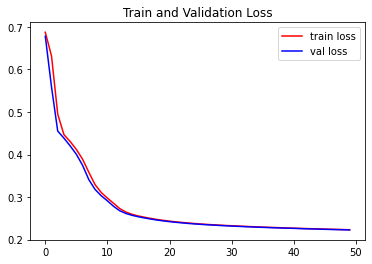

In [0]:
# plot train and valid loss history 
conv_autoencoder_loss_plot = plot_loss(conv_autoencoder_history)

In [0]:
# save trained model
path = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/'
model_name = 'conv_autoencoder.h5'

conv_autoencoder.save(path+model_name)

# Recreate the exact same model, including its weights and the optimizer
# conv_autoencoder = keras.models.load_model('conv_autoencoder.h5')

# Show the model architecture
# conv_autoencoder.summary()

### 4.2 Convolutional Autoencoder Embedding Features

In [0]:
# Generate embeddings using autoencoder model
encoded_imgs_train = conv_encoder.predict(train_X)
print(encoded_imgs_train.shape)

(44419, 8, 8, 8)


In [0]:
# flattern embedding features
output_shape_model = tuple([int(x) for x in encoded_imgs_train.shape[1:]])

encoded_imgs_train_flatten = encoded_imgs_train.reshape(-1, np.prod(output_shape_model))
print(encoded_imgs_train_flatten.shape)

(44419, 512)


In [0]:
# train dataset embedding feature dataframe
encoded_imgs_train_flatten_df = pd.DataFrame(encoded_imgs_train_flatten)
encoded_imgs_train_flatten_df['image_name'] = training_generator.filenames
cols = encoded_imgs_train_flatten_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
encoded_imgs_train_flatten_df = encoded_imgs_train_flatten_df[cols]
encoded_imgs_train_flatten_df.head()

,image_name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,15970.jpg,0.474241,2.002414,1.381798,0.396917,1.605099,1.892190,0.112622,2.648173,0.458198,1.932053,0.456311,0.416989,1.608963,0.246730,0.108493,2.150110,0.466911,1.919481,0.760565,0.461437,1.617200,0.461938,0.323747,2.144216,0.408884,1.106611,1.510259,1.043378,1.435520,0.000000,0.326265,1.715095,0.956387,1.308204,1.577475,0.533377,1.206578,0.000000,0.022177,...,0.594157,0.494488,0.751656,0.000000,0.700740,0.0,0.403940,0.604482,0.938242,0.740330,0.771630,0.0,0.904595,0.0,0.276254,0.976855,0.573908,1.027876,0.543693,0.0,1.882553,0.0,0.780451,1.495127,0.155618,0.789352,0.133382,0.0,2.337878,0.0,1.178329,1.560463,0.0,0.903100,0.614400,0.627656,1.842576,0.0,0.874840,0.902424
1,39386.jpg,0.355469,2.004111,1.401945,0.408514,1.524082,1.903847,0.019256,2.658368,0.982784,1.575837,0.630354,0.937829,1.307829,0.060145,0.810218,1.571042,0.768006,1.199740,0.773066,0.235285,1.142063,0.000000,0.879877,1.400698,0.489994,1.190569,0.612764,0.275745,1.177012,0.000000,0.976832,1.376083,0.688142,1.452772,0.842831,0.352075,0.954804,0.000000,0.774678,...,0.951675,0.896320,0.028459,0.000000,1.955177,0.0,0.887900,1.970459,0.329717,0.696330,0.085218,0.0,2.160373,0.0,1.335829,1.621999,0.967660,1.102683,0.329472,0.0,2.028888,0.0,1.120754,1.770142,0.089375,0.840798,0.057318,0.0,2.506122,0.0,1.228213,1.436487,0.0,0.901331,0.607092,0.625131,1.849381,0.0,0.878527,0.900819
2,59263.jpg,0.474241,2.002414,1.381798,0.396917,1.605099,1.892190,0.112622,2.648173,0.455979,1.932268,0.452110,0.415558,1.609526,0.244350,0.106375,2.150065,0.463508,1.932619,0.547380,0.421283,1.616343,0.302566,0.200080,2.152522,0.578174,1.671407,0.671586,0.486113,1.582749,0.167782,0.331321,2.114207,0.458379,1.927355,0.877187,0.388104,1.526967,0.206302,0.057713,...,0.370103,0.639247,0.000000,0.000000,2.149182,0.0,1.260237,1.487094,0.116764,0.728787,0.011409,0.0,2.444014,0.0,1.233029,1.544126,0.006327,0.576951,0.000000,0.0,2.450458,0.0,1.229437,1.406930,0.004798,0.573452,0.000000,0.0,2.450715,0.0,1.228836,1.405406,0.0,0.901331,0.607092,0.625131,1.849381,0.0,0.878527,0.900819
3,21379.jpg,0.489919,2.002173,1.384276,0.399092,1.598939,1.892733,0.100991,2.648959,0.509057,1.797389,0.529446,0.561690,1.532466,0.280792,0.587045,1.933485,0.684280,1.317532,0.689106,0.531557,1.466374,0.000000,1.071846,1.575618,0.750394,0.976405,0.936470,0.334029,0.819747,0.000000,1.305096,1.151918,0.814049,1.361301,0.782768,0.310908,0.980477,0.000000,0.727604,...,0.194727,0.800586,0.086882,0.000000,2.313157,0.0,1.234713,1.763388,0.753708,0.599706,0.119465,0.0,2.008173,0.0,1.259126,1.633616,0.274344,0.954887,0.197389,0.0,2.460650,0.0,1.281821,1.639825,0.007038,0.579293,0.000000,0.0,2.449232,0.0,1.230038,1.405265,0.0,0.901331,0.607092,0.625131,1.849381,0.0,0.878527,0.900819
4,53759.jpg,0.474241,2.002414,1.381798,0.396917,1.605099,1.892190,0.112622,2.648173,0.457127,1.931492,0.575493,0.429134,1.613284,0.329367,0.105574,2.149995,0.154755,1.259729,0.946656,1.328420,1.510063,0.377323,0.398130,1.685272,1.012205,0.773901,1.799888,0.548609,1.359630,0.000000,0.370450,1.872772,0.521235,1.919039,1.832668,0.374743,1.425333,0.003942,0.057658,...,0.644642,0.741369,0.659448,0.085842,0.359419,0.0,0.487316,0.720334,0.994835,0.633712,0.717144,0.0,0.424351,0.0,0.210920,0.769619,0.963334,1.185516,0.506379,0.0,1.860562,0.0,0.450071,1.705316,0.204187,0.894764,0.225971,0.0,2.376658,0.0,1.243676,1.734015,0.0,0.902162,0.607608,0.625790,1.849154,0.0,0.878609,0.901116


## 5. Image Search using Cosine Similarity

### 5.1 Image Seach using Internal Images

In [0]:
from sklearn.metrics.pairwise import pairwise_distances

def image_search(input_img_indx, top_n):
    input_img = encoded_imgs_train_flatten_df.iloc[input_img_indx,1:] # column 0 is image_name
    input_img = np.array(input_img).reshape(1, -1)
    cosine_sim = 1 - pairwise_distances(input_img, encoded_imgs_train_flatten_df.iloc[:,1:], metric='cosine')
    output_img_idx = [i[0] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][1:top_n+1]
    output_img_scores = [i[1] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][1:top_n+1]
    print('total number of cosine similarity scores',cosine_sim.shape)
    return encoded_imgs_train_flatten_df.iloc[output_img_idx,0], output_img_scores, output_img_idx

In [0]:
input_img_indx = 4026
top_n = 5
output_images, search_scores, output_img_idx = image_search(input_img_indx, top_n)
print(output_images)
print(search_scores)
print(output_img_idx)

total number of cosine similarity scores (1, 44419)
28137    21236.jpg
10442    17751.jpg
13006    31643.jpg
32972    18323.jpg
6720     23199.jpg
Name: image_name, dtype: object
[0.997619796729762, 0.9966633399724256, 0.9960494933030188, 0.9952992140634773, 0.9950083158311172]
[28137, 10442, 13006, 32972, 6720]


Target image and the top5 recommended images


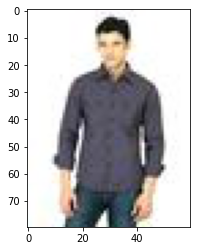

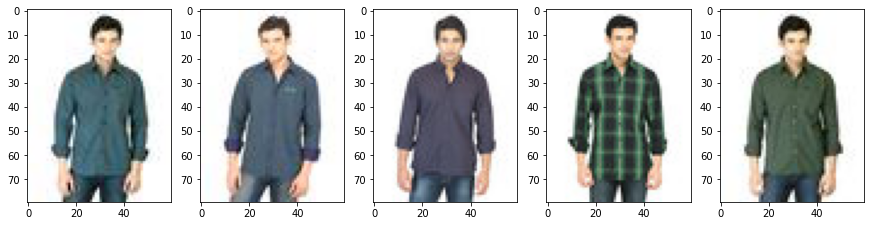

In [0]:
print('Target image and the top5 recommended images')
fname = encoded_imgs_train_flatten_df.iloc[input_img_indx,0]
input_image = mping.imread('images/' + fname)
plt.imshow(input_image)

fig = plt.figure(figsize=(15,14))
for i in range(top_n-4, top_n+1):
    image = mping.imread('images/' + output_images.iloc[i-1])
    fig.add_subplot(1, top_n, i)
    plt.imshow(image)
plt.show()

### 5.2 Evaluation of Image Search Model

In [0]:
# list top5 and target image features
output_img_idx.append(input_img_indx)
styles_image.iloc[output_img_idx,:]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_name,articleType_count
28137,21236,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,Highlander Men Blue Check Shirt,21236.jpg,3215
10442,17751,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Highlander Men Stripes Navy Blue Shirt,17751.jpg,3215
13006,31643,Men,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Indigo Nation Men Purple Shirt,31643.jpg,3215
32972,18323,Men,Apparel,Topwear,Shirts,Green,Fall,2011.0,Casual,Wills Lifestyle Men Check Green Shirt,18323.jpg,3215
6720,23199,Men,Apparel,Topwear,Shirts,Green,Fall,2011.0,Casual,Highlander Men Green Check Shirt,23199.jpg,3215
4026,22360,Men,Apparel,Topwear,Shirts,Blue,Fall,2011.0,Casual,John Players Men Check Blue Shirt,22360.jpg,3215


### 5.3 Image search using external images

(1, 60, 60, 3)


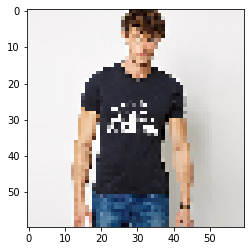

In [0]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# original image size
image_height = image.shape[1]
path = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/Images for visual search/'
my_image = "tshirt1.jpg" # blueshirt1.jpg, tshirt1.jpg, earing1.jpeg
fname = path + my_image
my_image = mpimg.imread(fname)
my_image = my_image * 1./255

resize_image = cv2.resize(my_image,(image_height, image_height))
plt.imshow(resize_image, interpolation='nearest')

resize_image = resize_image.reshape(1,resize_image.shape[0],resize_image.shape[1],resize_image.shape[2])
print(resize_image.shape)

In [0]:
# using trained autoencoder to generate encoding features
conv_encoded_image = conv_encoder.predict(resize_image)
print(conv_encoded_image.shape)

(1, 8, 8, 8)


In [0]:
def my_image_search(my_image, top_n):
    input_img = my_image
    input_img = np.array(input_img).reshape(1, -1)
    cosine_sim = 1 - pairwise_distances(input_img, encoded_imgs_train_flatten_df.iloc[:,1:], metric='cosine')
    output_img_idx = [i[0] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][:top_n]
    output_img_scores = [i[1] for i in sorted(enumerate(cosine_sim[0]), key=lambda x:x[1], reverse=True)][:top_n]
    print('total number of cosine similarity scores',cosine_sim.shape)
    return encoded_imgs_train_flatten_df.iloc[output_img_idx,0], output_img_scores

In [0]:
my_output_images, my_search_scores = my_image_search(conv_encoded_image, 5)
print(my_output_images)
print(my_search_scores)

total number of cosine similarity scores (1, 44419)
5844     13705.jpg
8255     26489.jpg
13376    27374.jpg
8655     23153.jpg
21570    14070.jpg
Name: image_name, dtype: object
[0.9853733, 0.98510015, 0.98392165, 0.98365235, 0.98357046]


Target image and the top5 recommended images


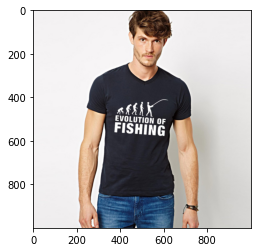

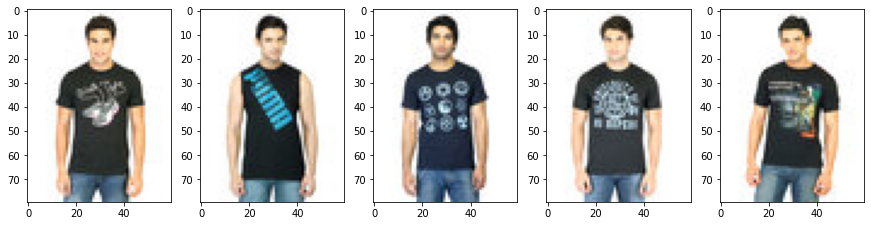

In [0]:
print('Target image and the top5 recommended images')
input_image = mping.imread(fname)
plt.imshow(input_image)

fig = plt.figure(figsize=(15,14))
for i in range(top_n-4, top_n+1):
    image = mping.imread('images/' + my_output_images.iloc[i-1])
    fig.add_subplot(1, top_n, i)
    plt.imshow(image)
plt.show()

### References:

[1] Building Autoencoders in Keras

https://blog.keras.io/building-autoencoders-in-keras.html

[2] Image Retrieval (via Autoencoders / Transfer Learning)

https://github.com/ankonzoid/artificio/tree/master/image_retrieval

[3] Similar Image Retrieval using Autoencoders

https://towardsdatascience.com/find-similar-images-using-autoencoders-315f374029ea